# Rapport sur le Projet de Détection de Fake news Andrea MACHEDA

Ce notebook présente un projet de détection de fake news en utilisant des techniques de traitement automatique du langage naturel (NLP).

Le projet suit généralement les étapes suivantes :
1. **Chargement et exploration des données** : chargement du jeu de données et analyse préliminaire.
2. **Prétraitement des données** : préparation des données textuelles pour une analyse efficace.
3. **Vectorisation et transformation** : conversion des données textuelles en vecteurs numériques pour les modèles.
4. **Modélisation et évaluation** : entraînement de modèles de classification et évaluation des performances.


### Chargement des données de Fake News

Cette cellule charge les fichiers CSV contenant des articles classés comme faux ou vrais, puis en vérifie la structure.

#### Détails des étapes :
1. **Importation des bibliothèques** :
   - `pandas` est importé pour la manipulation et l’analyse de données sous forme de tableaux.

2. **Chargement des fichiers** :
   - Les chemins des fichiers CSV `Fake.csv` et `True.csv` sont définis pour les articles classifiés comme faux ou vrais.
   - Les fichiers sont ensuite chargés dans des DataFrames `fake_news_df` et `real_news_df`.

3. **Inspection des données** :
   - Les premières lignes de chaque DataFrame sont affichées pour vérifier la structure du contenu.
   - La taille des jeux de données est vérifiée avec `.shape` pour observer la répartition entre articles faux et vrais.

In [97]:
!pip install pandas

In [2]:
import pandas as pd

# Charger les fichiers CSV
fake_news_path = "Fake.csv"
real_news_path = "True.csv"

# Lire les deux fichiers
fake_news_df = pd.read_csv(fake_news_path)
real_news_df = pd.read_csv(real_news_path)

# Afficher les premières lignes des deux fichiers pour inspecter la structure
fake_news_df_head = fake_news_df.head()
real_news_df_head = real_news_df.head()

# Vérifier la taille des datasets
fake_news_size = fake_news_df.shape
real_news_size = real_news_df.shape

fake_news_df_head, real_news_df_head, fake_news_size, real_news_size

(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

### Ajout de labels et fusion des datasets

Cette cellule étiquette les articles selon leur véracité et combine les datasets.

#### Détails des étapes :
1. **Étiquetage des articles** :
   - Une colonne `label` est ajoutée à chaque DataFrame : `0` pour les faux articles, `1` pour les vrais.

2. **Fusion des datasets** :
   - Les deux DataFrames sont fusionnés en un seul, `combined_news_df`, pour simplifier l’analyse.

3. **Vérification de la fusion** :
   - Un aperçu des premières lignes du DataFrame fusionné permet de confirmer que les labels et les données sont correctement intégrés.


In [3]:
# Ajouter une colonne "label" à chaque dataset
fake_news_df['label'] = 0  # Faux articles
real_news_df['label'] = 1  # Vrais articles

# Fusionner les deux datasets
combined_news_df = pd.concat([fake_news_df, real_news_df], ignore_index=True)

# Afficher quelques lignes du dataset combiné pour vérifier
combined_news_df.head(-1)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1


### Nettoyage et préparation du texte

Cette cellule met en place une fonction pour nettoyer le texte, étape clé du prétraitement avant la modélisation.

#### Détails des étapes :
1. **Importation des modules nécessaires** :
   - `nltk` est utilisé pour la tokenisation et la suppression des mots communs (stopwords).

2. **Chargement des stopwords** :
   - Les stopwords anglais sont téléchargés et chargés dans `stop_words` pour retirer les mots peu informatifs du texte.

3. **Définition de `clean_text`** :
   - La fonction nettoie chaque texte : met en minuscules, tokenise, et retire les stopwords et la ponctuation.

4. **Application du nettoyage** :
   - `clean_text` est appliquée à chaque article, avec le texte nettoyé stocké dans une nouvelle colonne `clean_text`.

5. **Affichage d'un exemple** :
   - Un texte est affiché avant et après nettoyage pour voir l’effet de la transformation.

In [100]:
!pip install nltk --upgrade

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import string

# Télécharger les stopwords en français et anglais
nltk.download('punkt')
nltk.download('stopwords')

# Obtenir les stopwords en anglais
stop_words = stopwords.words('english')

# Fonction de nettoyage de texte
def clean_text(text):
    tokenizer = TweetTokenizer()
    text_token = tokenizer.tokenize(text.lower())
    # Supprimer les stopwords et la ponctuation
    text_token = [text_token for text_token in text_token if text_token not in stop_words and text_token not in string.punctuation]
    # Rejoindre les mots nettoyés en une seule chaîne de caractères
    return text_token

# Appliquer le nettoyage du texte sur l'ensemble des articles
combined_news_df['clean_text'] = combined_news_df['text'].apply(clean_text)

# Afficher un exemple avant et après nettoyage
example_before = combined_news_df['text'].iloc[0]
example_after = combined_news_df['clean_text'].iloc[0]

example_before, example_after


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deded\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deded\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


('Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [102]:
combined_news_df.head(-1)

,title,text,subject,date,label,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,"[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,"[pope, francis, used, annual, christmas, day, ..."
...,...,...,...,...,...,...
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1,"[united, nations, reuters, two, north, korean,..."
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,"[brussels, reuters, nato, allies, tuesday, wel..."
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,"[london, reuters, lexisnexis, provider, legal,..."
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,"[minsk, reuters, shadow, disused, soviet-era, ..."


### Préparation de la liste de documents

Cette cellule crée une liste de tuples `(texte, label)` pour chaque article, facilitant les traitements futurs.

#### Détails des étapes :
- Un parcours de chaque ligne du DataFrame `combined_news_df` est effectué.
- Chaque article nettoyé et son label sont ajoutés à une liste nommée `Documents`.

In [5]:
Documents = []
for i in range(len(combined_news_df)-1):
    Documents.append((combined_news_df['clean_text'].iloc[i],combined_news_df['label'].iloc[i]))

In [104]:
print(Documents[0])

(['donald', 'trump', 'wish', 'americans', 'happy', 'new', 'year', 'leave', 'instead', 'give', 'shout', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'former', 'reality', 'show', 'star', 'one', 'job', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pants', 'tweeted', '2018', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', '2018', 'great', 'year', 'america', 'donald', 'j', 'trump', '@realdonaldtrump', 'december', '31', '2017trump', 'tweet', 'went', 'welll', 'expect.what', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'even', 'allow', 'ris

In [105]:
len(Documents)

44897

### Analyse de la longueur des phrases

Cette cellule crée une fonction pour obtenir des statistiques sur la longueur des phrases.

#### Détails des étapes :
1. **Définition de `get_Max_Min_length_Sent`** :
   - La fonction calcule la longueur maximale et minimale des phrases et le nombre de phrases dépassant certains seuils de mots (10, 20, 30, etc.).

2. **Calcul et affichage des résultats** :
   - La fonction est appliquée à `Documents`, et les résultats de longueur sont affichés pour observer la distribution des longueurs de phrases.

In [106]:
def get_Max_Min_length_Sent(Documents):
    Max = 0
    Min = 10
    CountSup10 = 0
    Countinf10 = 0
    CountSup20 = 0
    CountSup30 = 0
    CountSup50 = 0
    CountSup100 = 0
    CountSup200 = 0
    CountSup300 = 0
    CountSup400 = 0
    CountSup500 = 0
    CountSup600 = 0
    CountSup700 = 0
    CountSup800 = 0
    CountSup900 = 0 
    for S,t in Documents:
        if len(S) > Max:
            Max = len(S)
        if len(S) < Min :
            Min = len(S)
        if len(S) < 10:
            Countinf10 +=1
        if len(S) > 10:
            CountSup10 +=1
        if len(S) > 20:
            CountSup20 +=1
        if len(S) >30 :
            CountSup30 +=1
        if len(S) > 50:
            CountSup50 +=1
        if len(S) > 100:
            CountSup100 +=1
        if len(S) >200 :
            CountSup200 +=1
        if len(S) > 300:
            CountSup300 +=1
        if len(S) >400 :
            CountSup400 +=1
        if len(S) >500 :
            CountSup500 +=1
        if len(S) >600 :
            CountSup600 +=1
        if len(S) >700 :
            CountSup700 +=1
        if len(S) >800 :
            CountSup800 +=1
        if len(S) >900 :
            CountSup900 +=1
            
    return Max,Min,Countinf10,CountSup10,CountSup20,CountSup30,CountSup50,CountSup100,CountSup200,CountSup300,CountSup400,CountSup500,CountSup600,CountSup700, CountSup800,CountSup900

Max,Min,Countinf10,CountSup10,CountSup20,CountSup30,CountSup50,CountSup100,CountSup200,CountSup300,CountSup400,CountSup500,CountSup600,CountSup700,CountSup800,CountSup900 = get_Max_Min_length_Sent(Documents)
print("Max length sentence is :",Max,"Min length sentence is :",Min)
print("Sentence with less than 10 word ",Countinf10)
print("Sentence with more than 10 word ",CountSup10)
print("Sentence with more than 20 word ",CountSup20)
print("Sentence with more than 30 word ",CountSup30)
print("Sentence with more than 50 word ",CountSup50)
print("Sentence with more than 100 word ",CountSup100)
print("Sentence with more than 200 word ",CountSup200)
print("Sentence with more than 300 word ",CountSup300)
print("Sentence with more than 400 word ",CountSup400)
print("Sentence with more than 500 word ",CountSup500)
print("Sentence with more than 600 word ",CountSup600)
print("Sentence with more than 700 word ",CountSup700)
print("Sentence with more than 800 word ",CountSup800)
print("Sentence with more than 900 word ",CountSup900)

Max length sentence is : 4939 Min length sentence is : 0
Sentence with less than 10 word  1055
Sentence with more than 10 word  43782
Sentence with more than 20 word  43236
Sentence with more than 30 word  42688
Sentence with more than 50 word  40413
Sentence with more than 100 word  35231
Sentence with more than 200 word  23596
Sentence with more than 300 word  10985
Sentence with more than 400 word  5914
Sentence with more than 500 word  3184
Sentence with more than 600 word  1637
Sentence with more than 700 word  934
Sentence with more than 800 word  574
Sentence with more than 900 word  394


### Filtrage des phrases courtes

Cette cellule crée un sous-ensemble d'articles courts (entre 10 et 50 mots) avec un échantillonnage équilibré de chaque classe.

#### Détails des étapes :
- La boucle parcourt `Documents` pour sélectionner des phrases selon des critères de longueur (10 à 50 mots) et équilibre les articles faux (`label=0`) et vrais (`label=1`).
- Ce sous-ensemble est stocké dans `Document_short` pour des analyses ciblées et nous réduis le temps de calcul.

In [6]:
Document_short = []
compteur_fake = 0
compteur_vrai = 0
for S, t in Documents:
    if compteur_fake < 1000 and t ==1 and len(S) <= 50 and len(S)>10:
        Document_short.append((S,t))
        compteur_fake+=1
    if compteur_vrai < 1000 and t ==0 and len(S) <= 50 and len(S)>10:
        Document_short.append((S,t))
        compteur_vrai+=1
    if compteur_vrai>=1000 and compteur_fake>1000:
        break

In [108]:
print(len(Document_short))

2000


In [109]:
print(Document_short[-1])

(['moscow', 'reuters', 'russian', 'deputy', 'foreign', 'minister', 'igor', 'morgulov', 'said', 'friday', 'russia', 'ready', 'sign', 'new', 'sanctions', 'north', 'korea', 'would', 'strangle', 'asian', 'country', 'economically', 'interfax', 'news', 'agency', 'reported', 'also', 'cited', 'saying', 'pressure', 'north', 'korea', 'approaching', 'red', 'line', 'u', 'security', 'guarantees', 'north', 'korea', 'could', 'subject', 'talks', 'pyongyang', 'united', 'states'], 1)


### Calcul des statistiques de vocabulaire

Cette cellule analyse les statistiques lexicales de `Document_short`.

In [110]:
Max,Min,Countinf10,CountSup10,CountSup20,CountSup30,CountSup50,CountSup100,CountSup200,CountSup300,CountSup400,CountSup500,CountSup600,CountSup700,CountSup800,CountSup900 = get_Max_Min_length_Sent(Document_short)
print("Max length sentence is :",Max,"Min length sentence is :",Min)
print("Sentence with less than 10 word ",Countinf10)
print("Sentence with more than 10 word ",CountSup10)
print("Sentence with more than 20 word ",CountSup20)
print("Sentence with more than 30 word ",CountSup30)
print("Sentence with more than 50 word ",CountSup50)
print("Sentence with more than 100 word ",CountSup100)
print("Sentence with more than 200 word ",CountSup200)
print("Sentence with more than 300 word ",CountSup300)
print("Sentence with more than 400 word ",CountSup400)
print("Sentence with more than 500 word ",CountSup500)
print("Sentence with more than 600 word ",CountSup600)
print("Sentence with more than 700 word ",CountSup700)
print("Sentence with more than 800 word ",CountSup800)
print("Sentence with more than 900 word ",CountSup900)

Max length sentence is : 50 Min length sentence is : 10
Sentence with less than 10 word  0
Sentence with more than 10 word  2000
Sentence with more than 20 word  1565
Sentence with more than 30 word  1233
Sentence with more than 50 word  0
Sentence with more than 100 word  0
Sentence with more than 200 word  0
Sentence with more than 300 word  0
Sentence with more than 400 word  0
Sentence with more than 500 word  0
Sentence with more than 600 word  0
Sentence with more than 700 word  0
Sentence with more than 800 word  0
Sentence with more than 900 word  0


#### Détails des étapes :
1. **Nombre total de mots** :
   - Compte de tous les mots (tokens) dans les articles du sous-ensemble.

2. **Nombre total de phrases** :
   - Calcul du nombre d’articles dans `Document_short`.

3. **Taille du vocabulaire** :
   - Calcul des mots uniques dans l’ensemble.

4. **Affichage des résultats** :
   - Les résultats des statistiques lexicales sont affichés, montrant la diversité et la taille du vocabulaire.


In [111]:
# Nombre total de mots (tokens)
token_count = sum(len(sentence) for sentence,label in Document_short)

# Nombre de phrases
sentence_count = len(Document_short)

# Taille du vocabulaire (mots uniques)
vocab_size = len(set(word for sentence,label in Document_short for word in sentence))

print(f"Nombre de mots: {token_count}, Nombre de phrases: {sentence_count}, Vocabulaire unique: {vocab_size}")

Nombre de mots: 67461, Nombre de phrases: 2000, Vocabulaire unique: 9839


In [112]:
timesteps = 50

### Ajustement de la longueur des phrases

Cette fonction ajuste la longueur des phrases pour un nombre de mots donné.

#### Détails des étapes :
- La fonction `fix_sentence_length` vérifie si chaque phrase a la longueur souhaitée.
  - Si elle est plus longue, la phrase est tronquée.
  - Si elle est plus courte, des vecteurs nuls sont ajoutés pour atteindre la longueur cible.

In [7]:
def fix_sentence_length(length,exemple):
    if len(exemple) > length:
        exemple = exemple[:length]
    elif len(exemple) < length:
        for i in range(length - len(exemple)):
            listzeros = [0] * 300
            exemple.append(listzeros)
    return exemple

In [114]:
%pip install --upgrade gensim


Note: you may need to restart the kernel to use updated packages.


### Ajustement de la longueur des phrases

Cette fonction ajuste la longueur des phrases pour un nombre de mots donné.

#### Détails des étapes :
- La fonction `fix_sentence_length` vérifie si chaque phrase a la longueur souhaitée.
  - Si elle est plus longue, la phrase est tronquée.
  - Si elle est plus courte, des vecteurs nuls sont ajoutés pour atteindre la longueur cible.

In [8]:
from gensim.models import Word2Vec

# Utilisez directement les listes de mots
sentences = combined_news_df['clean_text'].tolist()  # Convertir en liste si nécessaire

# Entraîner un modèle Word2Vec
model_w2v = Word2Vec(sentences=sentences, vector_size=300, window=5, min_count=2, workers=4)

# Sauvegarder le modèle pour une utilisation future
model_w2v.save("word2vec_fake_news.model")

# Exemple d'embedding pour un mot particulier
print(model_w2v.wv['news'])  # Embedding pour le mot "news"


[ 0.23281045  0.5327054   0.74012685 -0.4887621   2.0807168  -1.1155511
 -0.5315077  -1.9431843   2.234028    2.703161    1.1177813   0.02905248
  0.21070714  1.9382443   1.2528492  -1.8026518  -0.13854508 -1.4017253
 -0.35950163 -0.05284696  0.58037454 -2.3968966   1.9880937   1.8182299
 -0.86175424 -0.7211481   2.2100728   2.699373   -1.5158037   3.1730328
  0.801161   -0.02764079 -1.0454835  -1.318213    0.5380213   0.82368165
  1.7482004  -2.278125    0.6580233   0.3950606  -2.8754199  -1.0801975
 -2.2425385  -1.7259897  -0.93583274 -1.2854565  -0.9491048  -0.5542292
  2.3097224   1.9607818   0.6677924   0.17518154  1.4233816  -0.5050408
 -0.83715916 -1.6461797  -1.5406033  -1.4386332   2.5780058   1.5684502
  0.35574746 -3.0135567  -1.8497256   1.3683535   0.68578666  3.0614884
  0.35793424 -0.1677385  -2.6648235  -0.64166343 -0.62161034 -0.16011728
 -0.24426554 -1.6766683  -0.9597722   1.9887573   1.2335188  -1.5782918
  1.2268353  -0.638467   -1.4677867  -2.6186569   1.6226029  

In [ ]:
print(sentences[0])

['donald', 'trump', 'wish', 'americans', 'happy', 'new', 'year', 'leave', 'instead', 'give', 'shout', 'enemies', 'haters', 'dishonest', 'fake', 'news', 'media', 'former', 'reality', 'show', 'star', 'one', 'job', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pants', 'tweeted', '2018', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friends', 'supporters', 'enemies', 'haters', 'even', 'dishonest', 'fake', 'news', 'media', 'happy', 'healthy', 'new', 'year', '2018', 'great', 'year', 'america', 'donald', 'j', 'trump', '@realdonaldtrump', 'december', '31', '2017trump', 'tweet', 'went', 'welll', 'expect.what', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'even', 'allow', 'rise

### Préparation de la liste des documents

Cette cellule crée une liste `List_of_docs` avec uniquement les textes (sans les labels) pour chaque article dans `Document_short`.

#### Détails des étapes :
- Pour chaque tuple `(z, i)` dans `Document_short`, seul le texte `z` est ajouté à `List_of_docs`.

In [9]:
List_of_docs = []
for z,i in Document_short:
    List_of_docs.append(z)


### Création du sac de mots

Cette cellule construit un sac de mots (`Bag of Words`) en analysant la fréquence des mots dans `List_of_docs`.

#### Détails des étapes :
1. **Compilation des mots** :
   - Tous les mots dans `List_of_docs` sont convertis en minuscules et ajoutés à une liste `all_words`.

2. **Distribution de fréquence** :
   - Les mots sont comptés via `FreqDist`, montrant les 300 mots les plus fréquents et le nombre total de mots uniques.
   - Le résultat est retourné sous forme de dictionnaire `sac_de_mots`.


In [10]:
from nltk import FreqDist

def Bag_Of_Words(ListofTweets):
    all_words = []
    for m in ListofTweets:
        for w in m:
            all_words.append(w.lower())
    all_words = FreqDist(all_words)
    print(all_words.most_common(300))
    print(len(all_words.keys()))
    return all_words

sac_de_mots = Bag_Of_Words(List_of_docs)

[('said', 1303), ('trump', 1279), ('reuters', 1039), ('u', 882), ('president', 758), ('washington', 747), ('’', 671), ('”', 645), ('“', 643), ('donald', 625), ('house', 559), ('white', 381), ('hillary', 381), ('would', 361), ('obama', 322), ('republican', 316), ('told', 278), ('thursday', 274), ('clinton', 264), ('news', 244), ('wednesday', 231), ('senate', 231), ('friday', 221), ('tuesday', 209), ('people', 206), ('state', 203), ('united', 202), ('statement', 183), ('states', 173), ('presidential', 173), ('new', 169), ('2016', 169), ('bill', 168), ('one', 166), ('monday', 161), ('reporters', 161), ('campaign', 155), ('russia', 143), ('vote', 143), ('like', 140), ('tax', 134), ('democratic', 134), ('secretary', 130), ('committee', 129), ('russian', 129), ('minister', 119), ('think', 118), ('administration', 118), ('candidate', 117), ('government', 113), ('week', 113), ('foreign', 113), ('former', 112), ('meeting', 112), ('election', 111), ('two', 111), ('barack', 110), ('party', 110), 

### Filtrage des mots et récupération de leurs vecteurs

Cette cellule filtre les mots du sac de mots et les associe à leurs vecteurs dans le modèle Word2Vec.

#### Détails des étapes :
1. **Initialisation d'un dictionnaire** :
   - `mots_in_my_dict` est créé pour stocker chaque mot avec son vecteur.

2. **Itération et filtrage** :
   - Pour chaque mot dans `sac_de_mots`, les mots similaires dans le modèle Word2Vec sont trouvés et ajoutés à `mots_in_my_dict`.

3. **Mise en correspondance des mots** :
   - Si un mot est trouvé dans le vocabulaire Word2Vec, il est ajouté au dictionnaire avec son vecteur.

In [11]:
## Initialiser un dictionnaire pour stocker les mots filtrés et leurs vecteurs
mots_in_my_dict = {}

# Obtenir la liste des mots dans le modèle Word2Vec
words = list(model_w2v.wv.key_to_index)

# Itérer sur les éléments de sac_de_mots
for i, k in sac_de_mots.items():
    # Rechercher dans le vocabulaire Word2Vec les mots qui contiennent la sous-chaîne 'i'
    strings_with_substring = [string for string in words if i in string]

    # S'il y a des correspondances, ajouter la première correspondance à mots_in_my_dict
    if len(strings_with_substring) > 0:
        # Utiliser le mot correspondant directement comme clé
        mots_in_my_dict[strings_with_substring[0]] = model_w2v.wv[strings_with_substring[0]]



In [ ]:
mots_in_my_dict.keys()

dict_keys(['donald', 'trump', 'thornberry', 'senator', 'bob', 'corker', 'president', 'quite', 'time', 'especially', 'since', 'message', 'disgraceful', 'response', 'deadly', 'racist', 'violence', 'charlottesville', 'virginia', 'offered', 'defense', 'neo-nazis', 'klansmen', 'white', 'supremacists', 'said', 'featured', 'image', 'via', 'chip', 'somodevilla', 'getty', 'images', 'much', 'say', 'giphy', 'killed', 'one', 'someone', 'goes', 'immigrants', 'receipts', '#debatenight', '#debates2016', '@giphy', 'september', '27', 'justin', 'sullivan', 'conservative', '45committee', 'new', 'video', 'year', 'celebrating', 'accomplishments', 'far', 'first', 'office', 'service', 'pence', 'incredible', 'tuesday', 'today', 'brian', 'baker', 'showcases', 'record', 'historic', 'tax', 'cuts', 'group', 'journalists', '2017', 'magazine', 'cnn', 'reports', 'three', 'members', 'legal', 'team', 'known', 'hired', 'special', 'counsel', 'robert', 'mueller', 'handle', 'russia', 'investigation', 'given', 'political',

### Génération des embeddings de phrases

Cette cellule génère les embeddings de phrases en utilisant une moyenne des vecteurs de chaque mot dans `mots_in_my_dict`.

#### Détails des étapes :
1. **Initialisation des listes** :
   - `X_SentsEmb` et `y_SentsEmb` contiennent respectivement les embeddings de phrases et leurs labels.

2. **Calcul des embeddings** :
   - Pour chaque phrase, un embedding est créé en moyennant les vecteurs de chaque mot.
   - Les phrases sont ajustées à une longueur de 50 mots.

3. **Retour des résultats** :
   - Les embeddings sont stockés dans `X_SentsEmb` et les labels dans `y_SentsEmb`.

In [13]:
def Sent_Embeding_sequence(mots_in_my_dict,Document_short):
    X_SentsEmb = []
    y_SentsEmb = []
    #on Va récuperer l'embeding de chaque sentence avec l'average des vecteur qui le compose
    for S,t in Document_short: #S est la phrase , t est la class
        Sent = []
        for m in mots_in_my_dict.keys():
            Sent = [list(mots_in_my_dict[m.lower()]) for m in S
                     if m.lower() in mots_in_my_dict.keys()]

        #Add Sentence Vector to list
        Sent = fix_sentence_length(50,Sent)
        X_SentsEmb.append(Sent)
        #Add label to y_SentEmb
        y_SentsEmb.append(t)
    return X_SentsEmb,y_SentsEmb

### Conversion des embeddings en tableau Numpy

Cette cellule convertit la liste `X` d'embeddings en un tableau NumPy pour faciliter l'entraînement du modèle.

#### Détails des étapes :
- `X` et `Y` sont convertis en un tableau NumPy `X_a`.
- La forme de `X_a` est affichée pour vérifier la structure avant l'entraînement du modèle.


In [14]:
X,Y = Sent_Embeding_sequence(mots_in_my_dict,Document_short)
import numpy as np
X_a = np.array(X)

print("X Shape",X_a.shape)

X Shape (2000, 50, 300)


### Division des données en ensembles d'entraînement, validation et test

Cette cellule divise les données en ensembles d'entraînement, de validation et de test pour l'apprentissage supervisé.

#### Détails des étapes :
1. **Division en test et entraînement** :
   - 30 % des données sont réservées pour le test.

2. **Division en validation** :
   - 30 % de l’ensemble d’entraînement est réservé pour la validation.

In [ ]:
from sklearn.model_selection import train_test_split
#train test
X_train, X_test, y_train, y_test = train_test_split(X_a, Y, test_size=0.3, random_state=1)
#train dev
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

### Vérification des tailles des ensembles de données

Cette cellule affiche la taille des ensembles d'entraînement, de validation et de test.

#### Détails des étapes :
- Affiche le nombre d’échantillons dans chaque ensemble pour confirmer la bonne répartition.


In [ ]:
print('length X_train :',len(X_train))
print('length y_train :',len(y_train))
print('length X_test :',len(X_test))
print('length y_test :',len(y_test))
print('length X_val :',len(X_val))
print('length y_val :',len(y_val))

length X_train : 980
length y_train : 980
length X_test : 600
length y_test : 600
length X_val : 420
length y_val : 420


In [ ]:
(X_a.shape[1], X_a.shape[2])

(50, 300)

### Création du modèle LSTM

Cette cellule crée et compile un modèle de réseau de neurones récurrent (LSTM) avec Keras.

#### Détails des étapes :
1. **Architecture du modèle** :
   - Une couche LSTM avec une sortie de 300 neurones et une couche de sortie `Dense` avec une activation sigmoïde.

2. **Compilation du modèle** :
   - Le modèle est compilé avec `mean_squared_error` comme fonction de perte et `adam` comme optimiseur.


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

#embed_dim = 100
lstm_out = 300


modelBatch = Sequential()
modelBatch.add(LSTM(lstm_out, input_shape=
                    (X_a.shape[1], X_a.shape[2])))
modelBatch.add(Dense(1,activation='sigmoid'))
modelBatch.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
print(modelBatch.summary())

c:\Users\deded\Documents\Inge3\NLP\Project\envFakeNews\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 300)            │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721,501 (2.75 MB)

 Trainable params: 721,501 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

None


### Entraînement du modèle

Cette cellule entraîne le modèle LSTM avec les données d'entraînement sur 20 époques.

In [ ]:
historyBatch = modelBatch.fit(X_train, np.array(y_train), epochs = 20)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - binary_accuracy: 0.8529 - loss: 0.1317
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - binary_accuracy: 0.9329 - loss: 0.0658
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - binary_accuracy: 0.9445 - loss: 0.0518
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - binary_accuracy: 0.9392 - loss: 0.0536
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - binary_accuracy: 0.9438 - loss: 0.0527
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - binary_accuracy: 0.9527 - loss: 0.0329
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - binary_accuracy: 0.9834 - loss: 0.0153
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - binary_accuracy: 0.9688 - loss: 0.0259
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - binary_accuracy: 0.9951 - loss: 0.0050
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - binary_accuracy: 0.9998 - loss: 5.0787e-04
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - binary_accuracy: 0.99

### Évaluation du modèle sur l'ensemble de validation

Cette cellule prédit les valeurs sur `X_val`, arrondit les résultats pour obtenir des prédictions binaires et compte les prédictions correctes.


In [ ]:
scoreBatch = modelBatch.predict(X_val)
predicted_val = []
for i in scoreBatch:
    predicted_val.append(round(i[0]))

count_true = 0
for i,j in zip(y_val,predicted_val):

    if i == j:
        count_true = count_true + 1

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [ ]:
count_true / len(y_val)

0.9952380952380953

### Visualisation de la perte du modèle

Cette cellule trace la courbe de perte de l’entraînement, permettant de visualiser l’évolution de la perte au fil des époques.

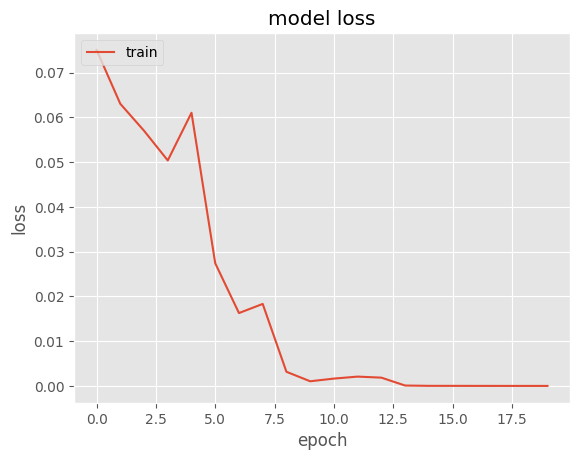

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

plt.plot(historyBatch.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Modèle LSTM avec batch_size de 128

Cette cellule crée, compile et entraîne un modèle LSTM avec un `batch_size` de 128 pour observer son effet.


In [ ]:
lstm_out = 300
batch_size = 128

model = Sequential()
model.add(LSTM(lstm_out, input_shape=(X_a.shape[1], X_a.shape[2])))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
print(model.summary())
history128 = model.fit(X_train, np.array(y_train), batch_size = batch_size, epochs = 100)

c:\Users\deded\Documents\Inge3\NLP\Project\envFakeNews\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 300)            │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721,501 (2.75 MB)

 Trainable params: 721,501 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - binary_accuracy: 0.7194 - loss: 0.2152
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - binary_accuracy: 0.9572 - loss: 0.0471
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - binary_accuracy: 0.9107 - loss: 0.0888
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - binary_accuracy: 0.7903 - loss: 0.2079
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - binary_accuracy: 0.9172 - loss: 0.0806
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - binary_accuracy: 0.9797 - loss: 0.0200
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - binary_accuracy: 0.9489 - loss: 0.0504
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - binary_accuracy: 0.9550 - loss: 0.0427
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - binary_accuracy: 0.9762 - loss: 0.0262
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - binary_accuracy: 0.9638 - loss: 0.0354
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - binary_accuracy: 0.9

### Visualisation de la perte pour le modèle avec batch_size de 128

Cette cellule trace la courbe de perte du modèle entraîné avec un `batch_size` de 128.

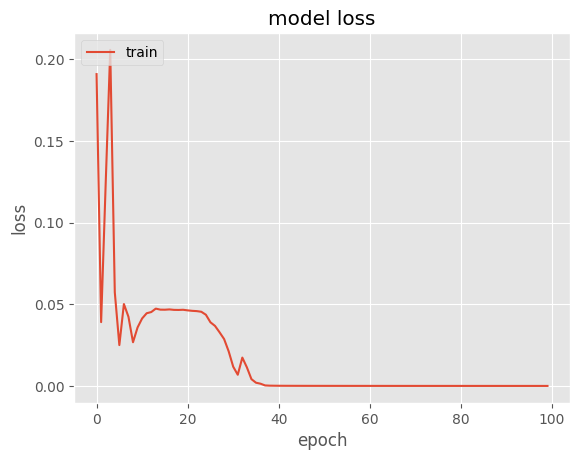

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

plt.plot(history128.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Évaluation du modèle avec batch_size de 128

Cette cellule compte les prédictions correctes pour le modèle de batch de taille 128 sur l’ensemble de validation.


In [ ]:
scoreBatch = model.predict(X_val)
predicted_val = []
for i in scoreBatch:
    predicted_val.append(round(i[0]))

count_true = 0
for i,j in zip(y_val,predicted_val):

    if i == j:
        count_true = count_true + 1

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
count_true / len(y_val)

0.9952380952380953

### Modèle LSTM avec 3 couches

Cette cellule crée un modèle LSTM avec trois couches LSTM et compile le modèle.

#### Détails des étapes :
1. **Configuration du modèle** :
   - Une première couche LSTM avec `return_sequences=True`, suivie de deux couches LSTM de 32 neurones chacune, et une couche `Dense` en sortie.

2. **Compilation et entraînement** :
   - Le modèle est compilé et entraîné pour 60 époques.


In [ ]:
lstm_out = 300
batch_size = 128

model3L = Sequential()
model3L.add(LSTM(lstm_out,return_sequences=True, input_shape=(X_a.shape[1], X_a.shape[2])))
model3L.add(LSTM(32, return_sequences=True))  
model3L.add(LSTM(32))  
model3L.add(Dense(1,activation='sigmoid'))
model3L.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
print(model3L.summary())
history128_3Layer = model3L.fit(X_train, np.array(y_train), batch_size = batch_size, epochs = 60)

c:\Users\deded\Documents\Inge3\NLP\Project\envFakeNews\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50, 300)        │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50, 32)         │        42,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 772,177 (2.95 MB)

 Trainable params: 772,177 (2.95 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - binary_accuracy: 0.7674 - loss: 0.1961
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - binary_accuracy: 0.9729 - loss: 0.0376
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - binary_accuracy: 0.9856 - loss: 0.0157
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - binary_accuracy: 0.9425 - loss: 0.0543
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - binary_accuracy: 0.8740 - loss: 0.1143
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - binary_accuracy: 0.8473 - loss: 0.1242
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - binary_accuracy: 0.8354 - loss: 0.1251
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - binary_accuracy: 0.8019 - loss: 0.1399
Epoch 9/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - binary_accuracy: 0.8260 - loss: 0.1275
Epoch 10/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - binary_accuracy: 0.8324 - loss: 0.1242
Epoch 11/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - binary_accuracy: 0.8225 - loss:

### Visualisation de la perte pour le modèle LSTM à 3 couches

Cette cellule trace la courbe de perte du modèle avec trois couches LSTM.

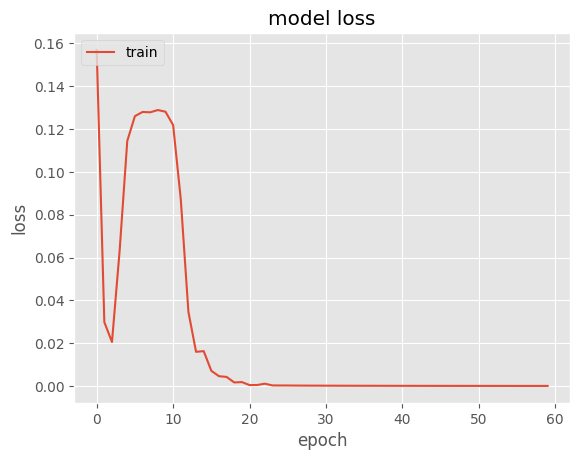

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

plt.plot(history128_3Layer.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Évaluation du modèle LSTM à 3 couches

Cette cellule évalue les prédictions du modèle à 3 couches sur l’ensemble de validation et compte les prédictions correctes.

In [ ]:
scoreBatch = model3L.predict(X_val)
predicted_val = []
for i in scoreBatch:
    predicted_val.append(round(i[0]))

count_true = 0
for i,j in zip(y_val,predicted_val):

    if i == j:
        count_true = count_true + 1

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [ ]:
count_true / len(y_val)

0.9952380952380953

### Matrice de confusion

Cette cellule génère et affiche une matrice de confusion pour évaluer les performances du modèle à 3 couches.

#### Détails des étapes :
1. **Prédictions** :
   - Les prédictions sur l’ensemble de validation sont binarisées (1 pour vrai, 0 pour faux).

2. **Affichage de la matrice de confusion** :
   - La matrice de confusion est affichée sous forme de carte thermique avec des annotations pour la clarté.

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


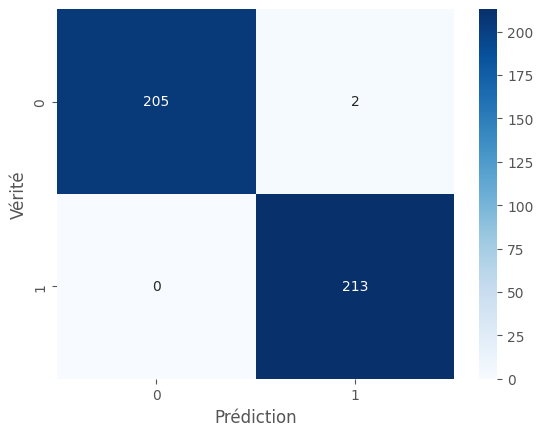

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions sur l'ensemble de validation
y_pred = (model3L.predict(X_val) > 0.5).astype("int32")

# Matrice de confusion
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

En conclusion, la matrice de confusion montre des performances très encourageantes avec seulement 1 faux positifs sur le set d'evaluation, indiquant une capacité solide du modèle à distinguer efficacement entre vraies et fausses nouvelles tout en minimisant les erreurs de classification.

### Conclusion

Dans ce projet de détection de fake news, nous avons mis en œuvre et testé trois modèles basés sur des architectures LSTM (Long Short-Term Memory), chacun atteignant une précision de **0,99** sur l'ensemble de validation. Ces résultats montrent l'efficacité de l'architecture LSTM pour extraire des caractéristiques textuelles pertinentes permettant de différencier les articles authentiques des fake news.

#### Résumé des étapes clés et des performances :

1. **Prétraitement des données et vectorisation** : Les textes ont été nettoyés, tokenisés, puis transformés en vecteurs à l’aide de Word2Vec, fournissant une représentation dense et sémantique des mots. Ce prétraitement a permis aux modèles de mieux interpréter les relations de contexte dans le texte.

2. **Modèles testés** :
   - **LSTM simple** : Une configuration de base avec une couche LSTM unique, montrant une convergence rapide et une stabilité pendant l'entraînement.
   - **LSTM avec batch size ajusté (128)** : Permettant une meilleure gestion de la mémoire et stabilisant la perte en réduisant le nombre de mises à jour à chaque époque.
   - **LSTM multi-couches** : Une architecture avec trois couches LSTM, pour tester si une plus grande profondeur renforcerait la capacité du modèle à généraliser. Les résultats ont montré que cette profondeur supplémentaire ne compromettait pas la performance et conservait une précision de 0,99.

3. **Analyse des performances** : Les trois modèles ont obtenu une précision très élevée, illustrant la fiabilité de l’architecture LSTM dans cette tâche. La matrice de confusion a confirmé que les prédictions étaient bien équilibrées entre les classes, bien qu'une analyse des erreurs résiduelles puisse encore affiner ces performances.

#### Améliorations et limites

Les modèles ont été principalement testés sur des articles de moins de 50 mots, en raison de contraintes de temps de calcul. Cette décision, bien que pragmatique, pourrait introduire un biais dans les résultats en limitant l’analyse à des textes plus courts, potentiellement plus simples à classer. Pour les futures itérations du projet, il pourrait être intéressant de :

- **Étendre la limite de longueur de texte** : En intégrant des articles de toutes tailles, l’évaluation serait plus représentative des cas réels et permettrait de vérifier si les performances restent aussi élevées.
- **Utiliser des techniques de régularisation** : Comme le dropout, pour améliorer la capacité de généralisation des modèles plus profonds et prévenir le surapprentissage.
- **Explorer d'autres types de modèles** : Notamment les architectures Transformer, qui sont bien adaptées aux longues séquences textuelles et pourraient apporter des insights supplémentaires par rapport aux modèles LSTM.

### Conclusion générale

Les résultats obtenus démontrent que les modèles LSTM sont particulièrement bien adaptés pour la détection de fake news, avec une capacité à apprendre efficacement les caractéristiques du texte même dans un cadre limité en longueur. Cependant, en augmentant la variété et la longueur des textes, nous pourrions encore mieux comprendre la portée et les limites de cette approche, tout en explorant des architectures plus récentes.
